In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print("📊 Jumlah Record :", df.shape[0])
print("📊 Jumlah Attribute :", df.shape[1])
print("\n🧩 Nama-nama Attribute:")
print(list(df.columns))

num_cols = df.select_dtypes(include=np.number).columns
obj_cols = df.select_dtypes(include='object').columns

print("\n🔢 Jumlah Attribute Numerik:", len(num_cols))
print("🔠 Jumlah Attribute Object:", len(obj_cols))


📊 Jumlah Record : 768
📊 Jumlah Attribute : 9

🧩 Nama-nama Attribute:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

🔢 Jumlah Attribute Numerik: 9
🔠 Jumlah Attribute Object: 0


In [6]:
desc = df.describe().T
desc['Q1'] = df.quantile(0.25)
desc['Q2'] = df.quantile(0.50)
desc['Q3'] = df.quantile(0.75)
desc = desc[['mean','std','min','Q1','Q2','Q3','max']]
desc

,mean,std,min,Q1,Q2,Q3,max
Pregnancies,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.select_dtypes(include=np.number).head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
if len(obj_cols) == 0:
    print("Tidak ada atribut bertipe object — semua atribut bertipe numerik.")
else:
    for col in obj_cols:
        print(f"\nKolom: {col}")
        print(f"Jumlah label unik: {df[col].nunique()}")
        print("Label unik:", df[col].unique())

Tidak ada atribut bertipe object — semua atribut bertipe numerik.


In [9]:
print("Jumlah Missing Value di setiap kolom:\n")
print(df.isnull().sum())

Jumlah Missing Value di setiap kolom:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


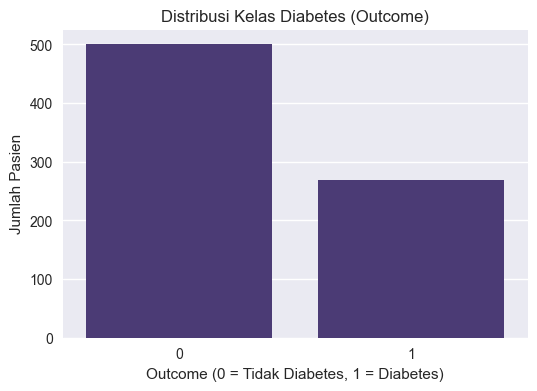

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Kelas Diabetes (Outcome)")
plt.xlabel("Outcome (0 = Tidak Diabetes, 1 = Diabetes)")
plt.ylabel("Jumlah Pasien")
plt.show()

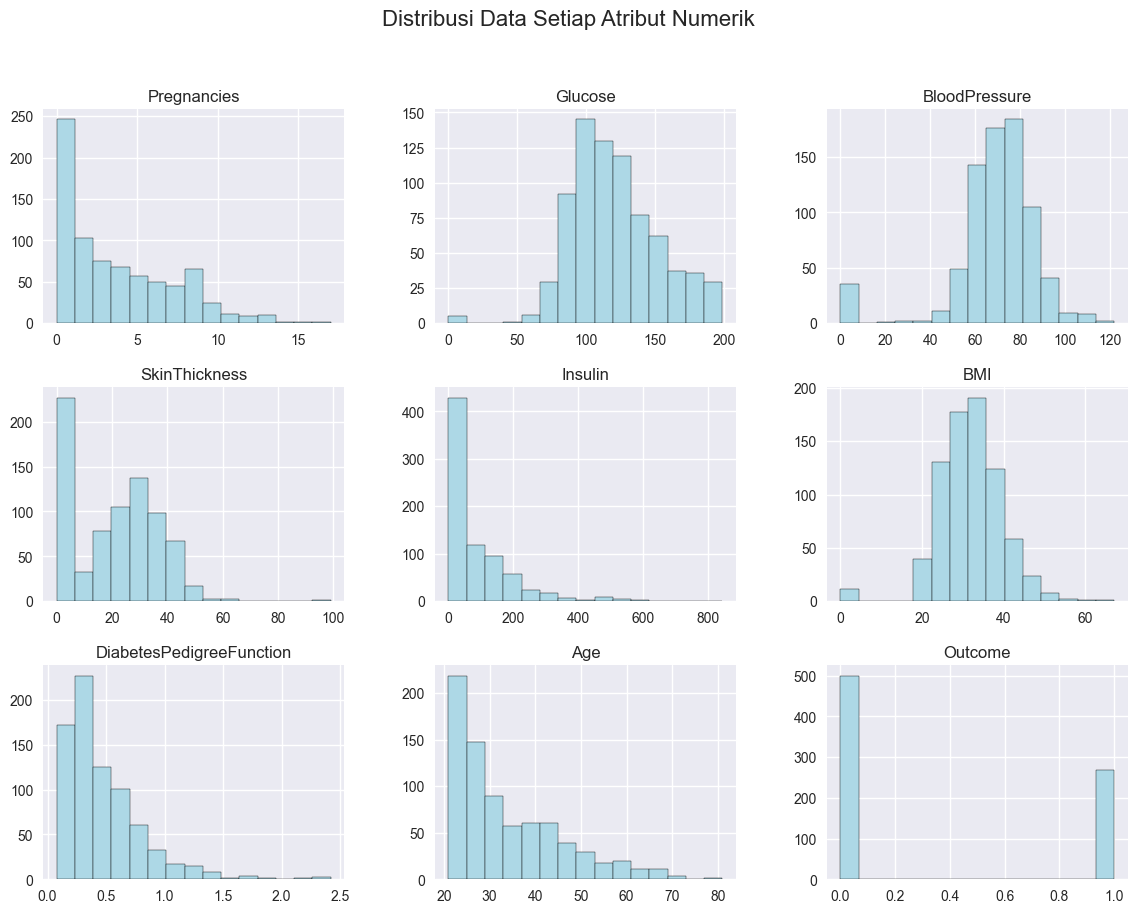

In [11]:
df.hist(figsize=(14,10), bins=15, color='lightblue', edgecolor='black')
plt.suptitle("Distribusi Data Setiap Atribut Numerik", fontsize=16)
plt.show()

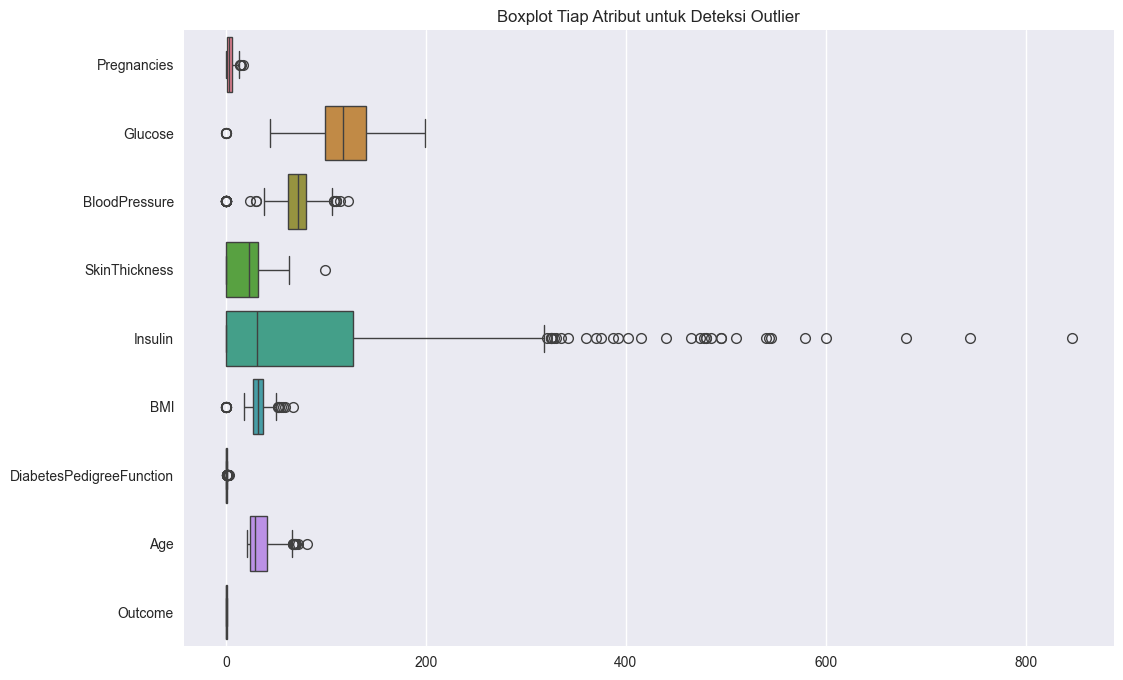

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot Tiap Atribut untuk Deteksi Outlier")
plt.show()

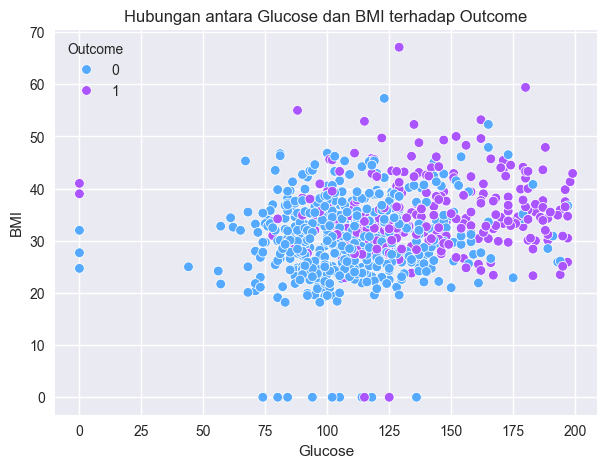

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='cool')
plt.title("Hubungan antara Glucose dan BMI terhadap Outcome")
plt.show()

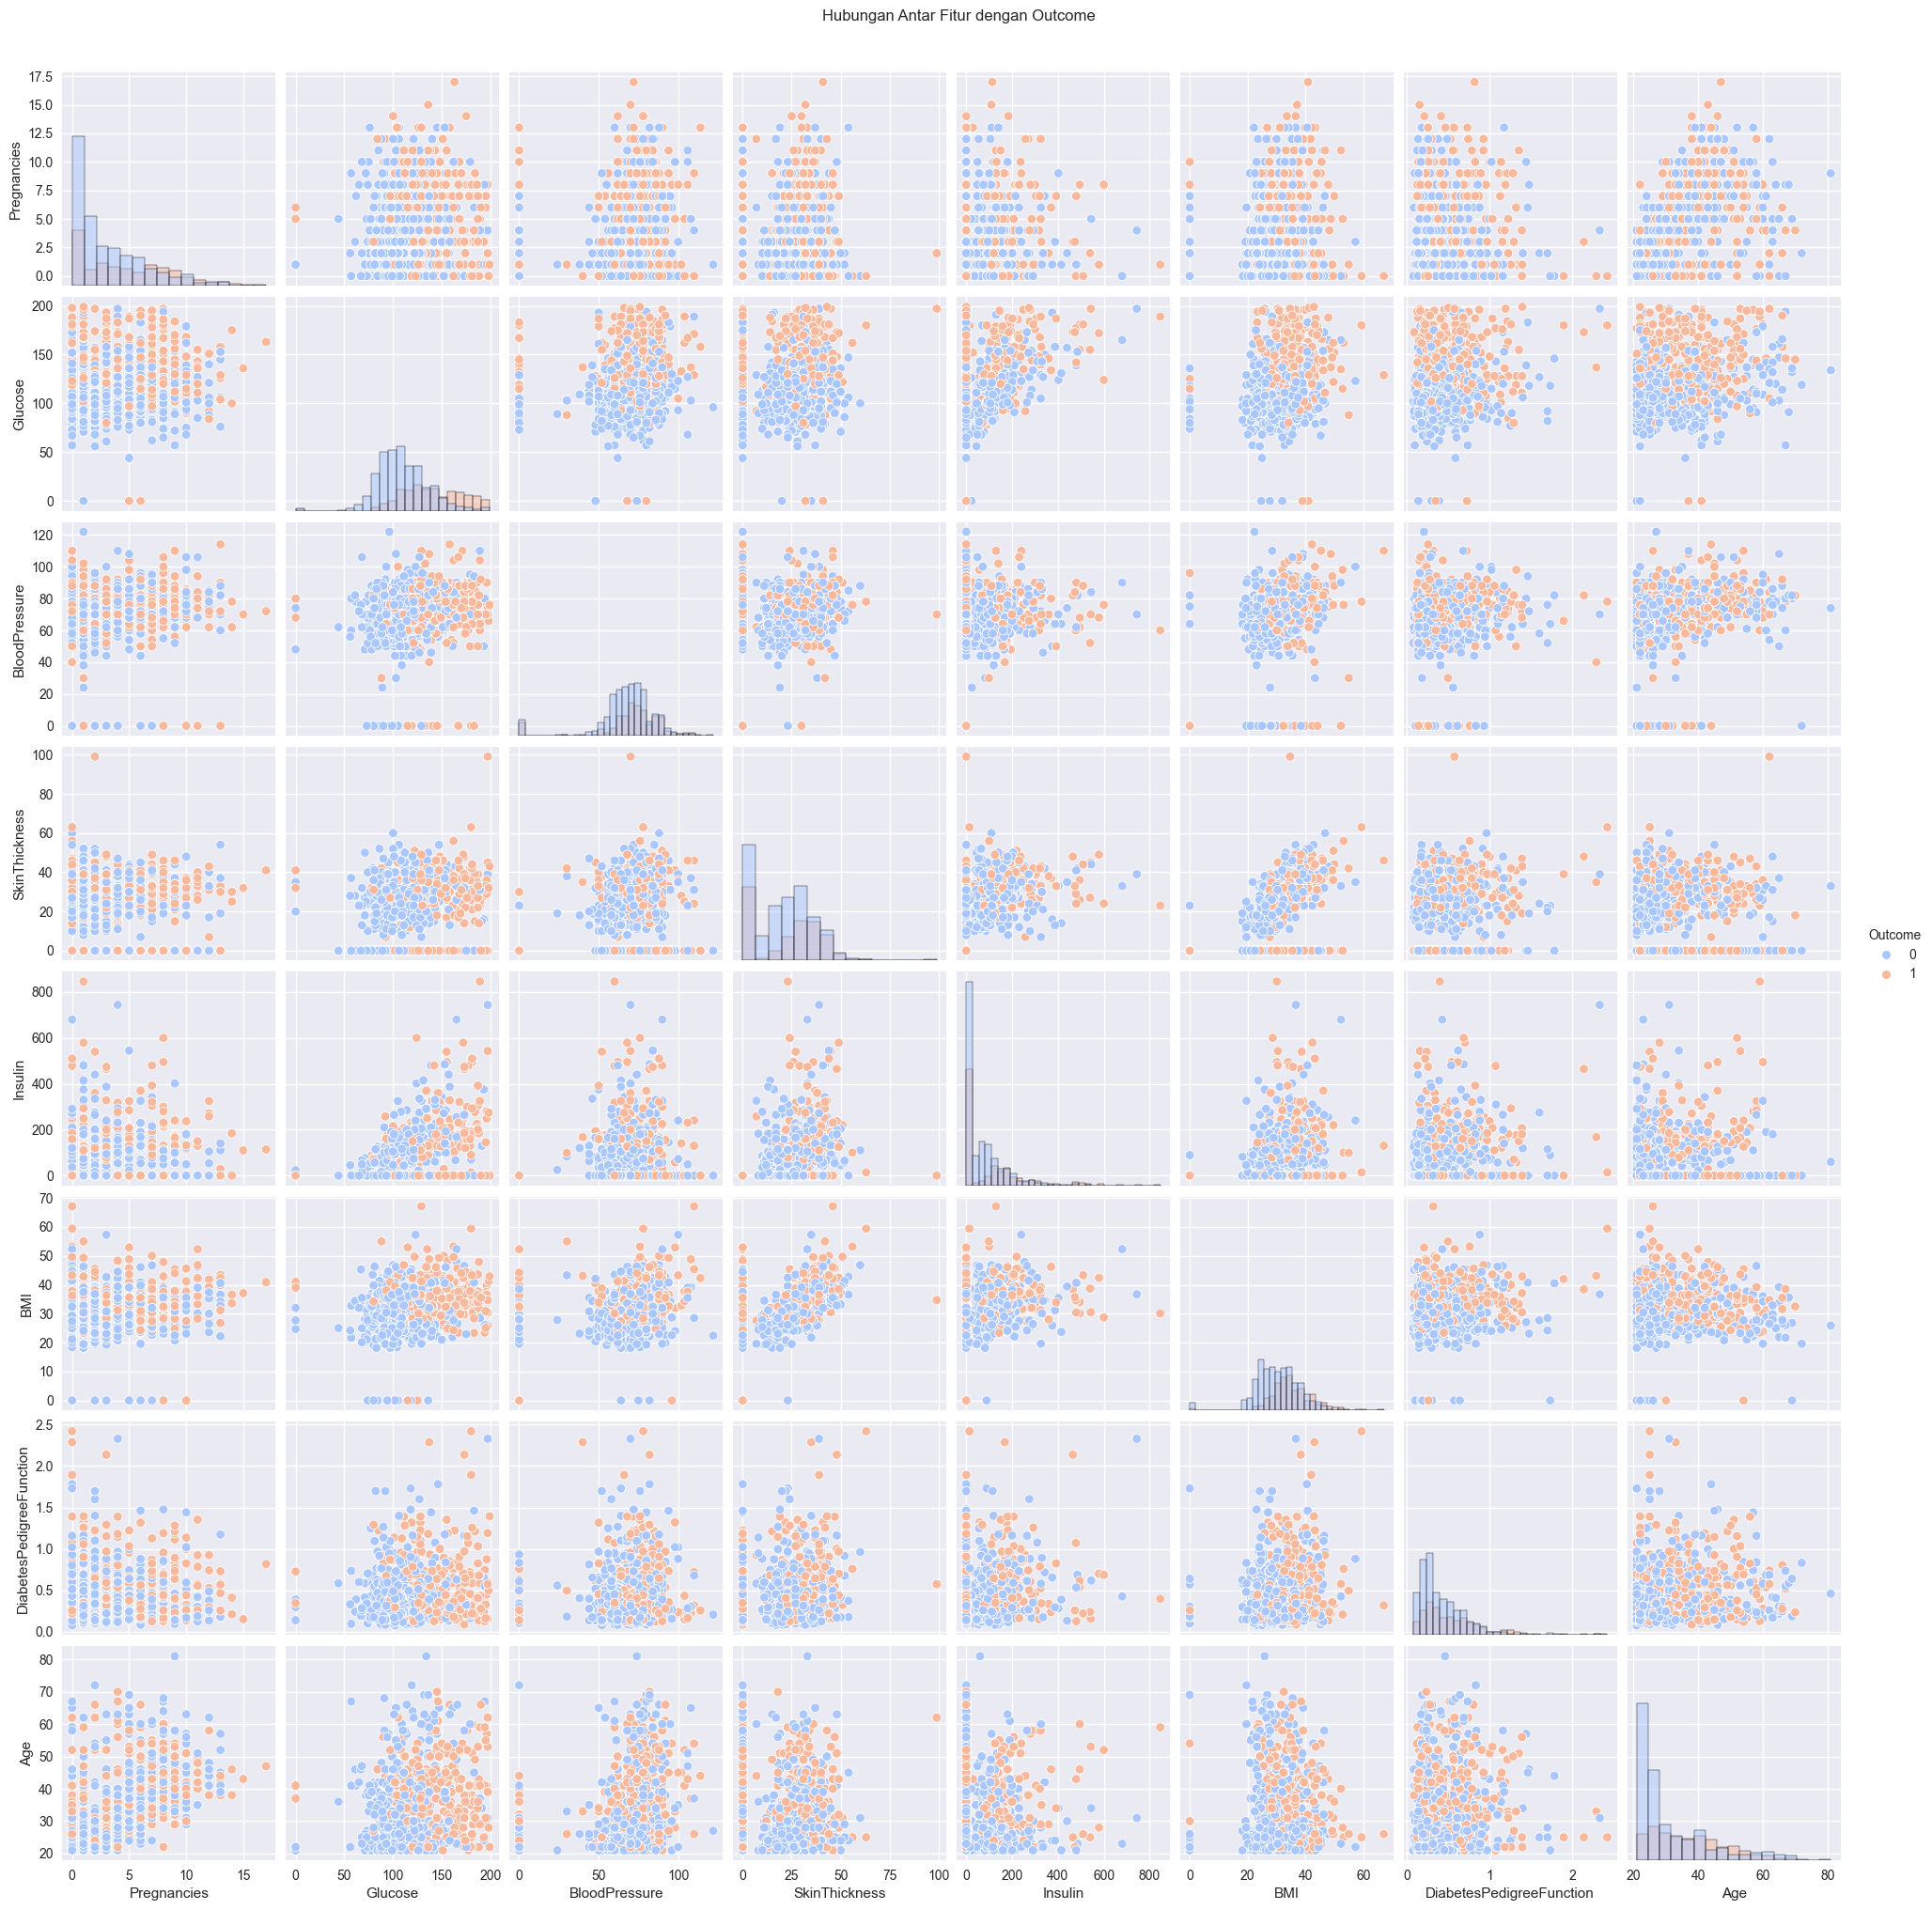

In [15]:
sns.pairplot(df, hue="Outcome", diag_kind="hist", palette="coolwarm")
plt.suptitle("Hubungan Antar Fitur dengan Outcome", y=1.02)
plt.show()

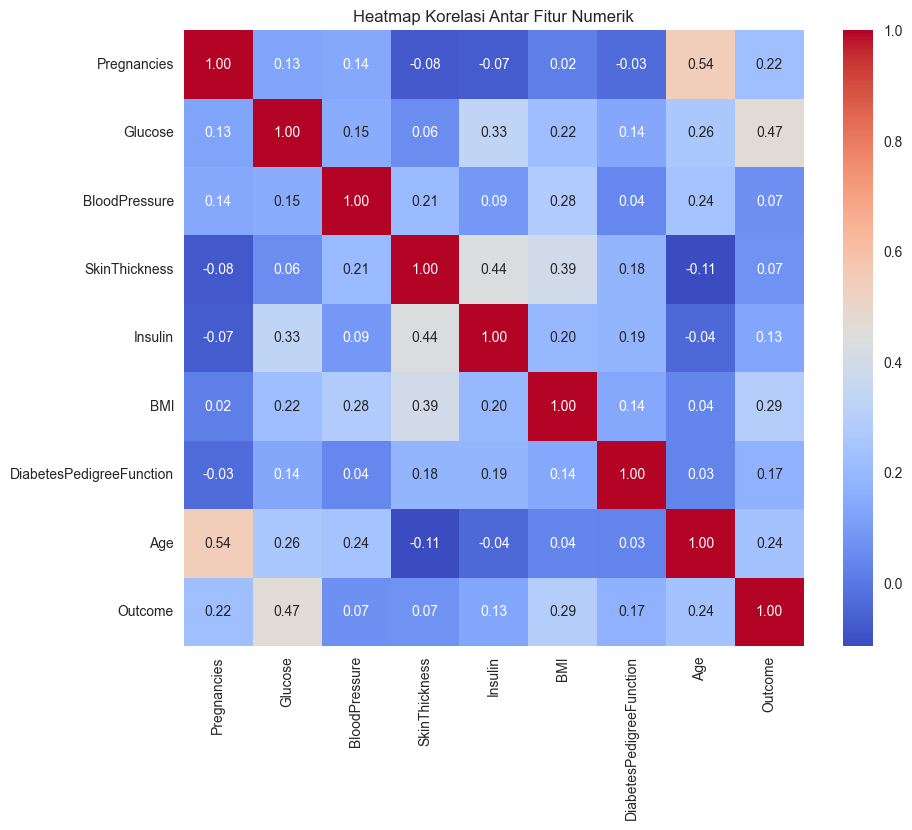

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

In [17]:
corr_target = df.corr()['Outcome'].sort_values(ascending=False)
corr_target

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

# 📊 Analisis Dataset: Diabetes Prediction (Pima Indians Diabetes)

---

## 🧾 Informasi Dataset
Dataset ini berisi data medis pasien suku Indian Pima untuk memprediksi kemungkinan menderita diabetes berdasarkan berbagai parameter biologis.

**Rincian Dataset:**
- Jumlah record: 768
- Jumlah atribut: 9
- Tipe data: Semua numerik
- Nama atribut:
  - Pregnancies
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI
  - DiabetesPedigreeFunction
  - Age
  - Outcome

---

## 📈 Statistik Deskriptif

| Statistik | Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI | DiabetesPedigreeFunction | Age |
|------------|-------------|----------|----------------|----------------|----------|------|---------------------------|------|
| Rata-rata | 3.84 | 120.89 | 69.10 | 20.54 | 79.80 | 31.99 | 0.47 | 33.24 |
| Std Dev | 3.37 | 31.97 | 19.36 | 15.95 | 115.24 | 7.88 | 0.33 | 11.76 |
| Minimum | 0 | 0 | 0 | 0 | 0 | 0 | 0.078 | 21 |
| Kuartil 1 (Q1) | 1 | 99 | 62 | 0 | 0 | 27.3 | 0.24 | 24 |
| Median (Q2) | 3 | 117 | 72 | 23 | 30.5 | 32.0 | 0.37 | 29 |
| Kuartil 3 (Q3) | 6 | 140 | 80 | 32 | 127.25 | 36.6 | 0.63 | 41 |
| Maksimum | 17 | 199 | 122 | 99 | 846 | 67.1 | 2.42 | 81 |

> 💡 Tabel di atas menggambarkan ringkasan statistik tiap fitur numerik pada dataset.

---

## 🚫 Pengecekan Missing Value
Semua kolom memiliki nilai 0 missing value.  
✅ Dataset bersih dan siap digunakan tanpa perlu proses imputasi data.

---

## 📊 Visualisasi Data

### 🔸 Distribusi Outcome
- Outcome = 0 → Tidak diabetes  
- Outcome = 1 → Diabetes  
- Jumlah pasien tanpa diabetes lebih banyak dibandingkan pasien yang diabetes.

### 🔸 Distribusi Atribut Numerik
- Glucose dan BMI menunjukkan sebaran miring ke kanan.  
- Fitur Insulin dan SkinThickness memiliki banyak nilai ekstrem (outlier).

### 🔸 Korelasi antar Fitur (Heatmap)
- Korelasi tertinggi terhadap Outcome:
  - Glucose (0.49)
  - BMI (0.29)
  - Age (0.24)

---

## 🔍 Insight dari Visualisasi
- Kadar glukosa darah merupakan indikator paling kuat terhadap kemungkinan diabetes.  
- Nilai BMI tinggi juga menjadi faktor risiko utama.  
- Usia lebih tua meningkatkan kemungkinan menderita diabetes.  
- Hubungan antar fitur relatif rendah, sehingga cocok untuk model machine learning tanpa multikolinearitas tinggi.

---

## 🧠 Kesimpulan Akhir
- Dataset berisi 768 baris dan 9 atribut numerik tanpa data kosong.  
- Faktor paling memengaruhi diabetes: **Glucose**, **BMI**, dan **Age**.  
- Distribusi kelas agak tidak seimbang (lebih banyak pasien non-diabetes).  
- Dataset ini bersih, informatif, dan ideal untuk eksperimen prediksi menggunakan algoritma klasifikasi seperti **Logistic Regression**, **Random Forest**, atau **SVM**.